In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from anemoi.datasets import open_dataset
import cmocean

In [3]:
#open dataset
file_path = f'/lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2023.zarr'
ds = open_dataset(file_path, select = ["Uwind_eastward"])


# Create a figure and axis with coastlines
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the scatter plot
sc = ax.scatter(ds.longitude, ds.latitude, c=ds.isel(time=0)['temperature_1'], s=5, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='Temperature')

# Update function for animation
def update(frame):
    sc.set_array(ds.isel(time=frame)['temperature_1'].values)
    ax.set_title(f'Time step: {frame}')
    return sc,

# Create animation 48 h
ani = FuncAnimation(fig, update, frames=range(48), blit=True, interval=200)

# Save the animation as a GIF (optional)
ani.save('temperature_animation.gif', writer='imagemagick') # or ffmpeg


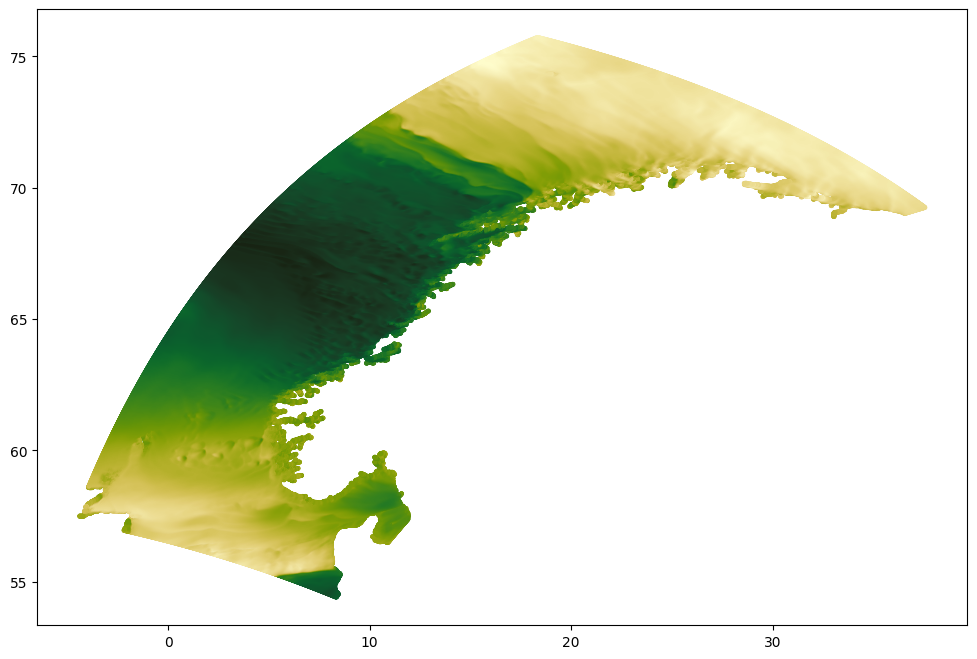

In [13]:
fig,ax = plt.subplots(figsize = (12,8))
sc = ax.scatter(ds.longitudes, ds.latitudes, c=ds[0,0,0,:], s = 5, cmap = cmocean.cm.speed)


In [ ]:
fig,ax = plt.subplots(figsize = (12,8))
sc = ax.scatter(ds.longitudes, ds.latitudes, c=ds[0,0,0,:], s = 5, cmap = cmocean.cm.speed)
cbar = plt.colorbar(sc, ax = ax, orientation = "vertical", label = "Uwind")
def update(frame):
    sc.set_array(ds[frame,0,0,:])
    ax.set_title(f'Time step: {frame}')
    return sc

ani = FuncAnimation(fig, update, frames = range(48), interval = 200)
ani.save("temp_animation_0_25_2023.gif", writer = "imagemagick")

In [ ]:
#sjekke for v + abs(u+v)
#lage funksjon i python heller så kjøretiden blir saktere
#får ikke til å kjøre koden i python fila, sjekker for feilmeldinger i ipynb først

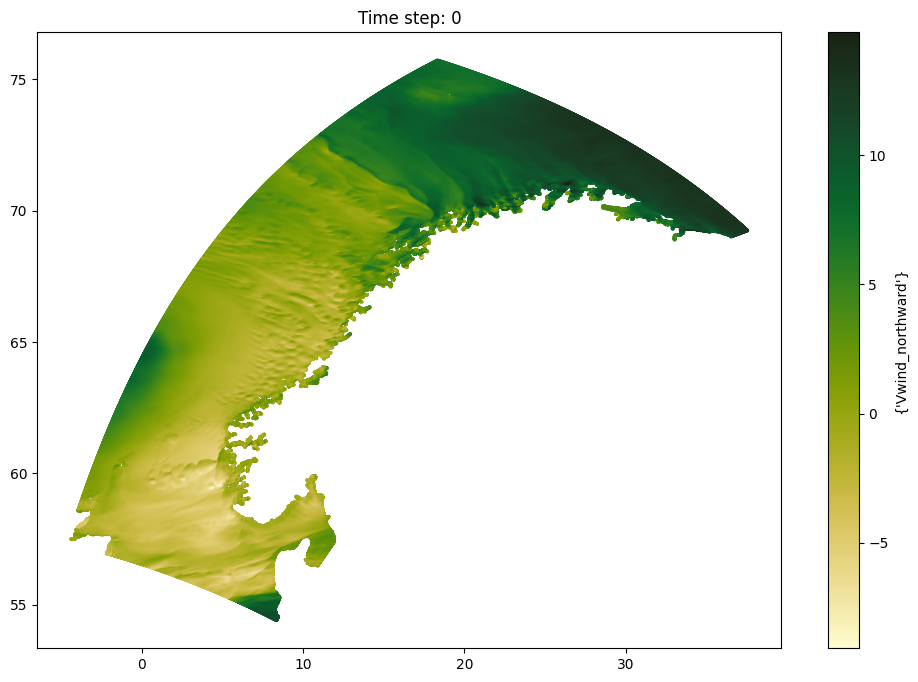

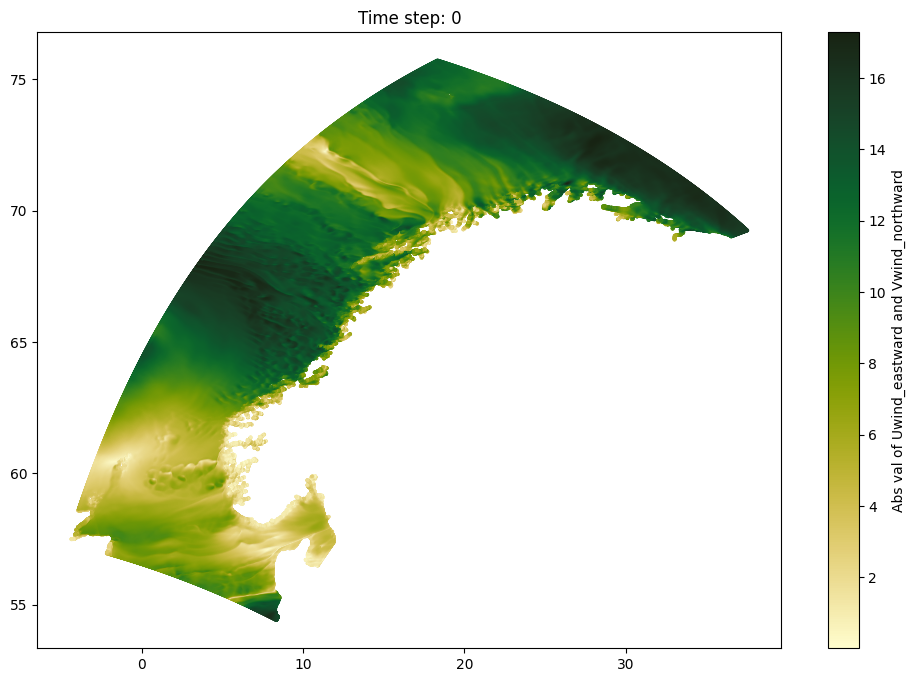

In [4]:
#from py file - same code but changed to functions for easier use
#animation of windfields

import numpy as np 

def anim_wind(file_name, variable, frame):
    ds = open_dataset(file_name, select = variable)
    fig,ax = plt.subplots(figsize=(12,8))
    sc = ax.scatter(ds.longitudes, ds.latitudes, c=ds[0,0,0,:], s = 2, cmap = cmocean.cm.speed)
    cbar = plt.colorbar(sc, ax=ax, orientation = "vertical", label = variable)
    
    def update(frame): 
        sc.set_array(ds[frame,0,0,:])
        ax.set_title(f'Time step: {frame}')
        return sc
    
    ani = FuncAnimation(fig, update, frames = range(frame), interval = 200)
    ani.save(f"wind_animation_2023_{variable}.gif", writer = "imagemagick")

    

def anim_wind_abs(file_name, variable1, variable2, frame):
    ds = open_dataset(file_name, select = [variable1,variable2])
    abs = np.sqrt(ds[0,0,0,:]**2 + ds[0,1,0,:]**2)
    fig,ax = plt.subplots(figsize=(12,8))
    sc = ax.scatter(ds.longitudes, ds.latitudes, c=abs, s = 2, cmap = cmocean.cm.speed)
    cbar = plt.colorbar(sc, ax = ax, orientation = "vertical", label = f'Abs val of {variable1} and {variable2}')

    def update_abs(frame):
        abs = np.sqrt(ds[frame,0,0,:]**2 + ds[frame,1,0,:]**2)   
        sc.set_array(abs)
        ax.set_title(f'Time step: {frame}')
        return sc
    
    ani = FuncAnimation(fig, update_abs, frames = range(frame), interval = 200)
    ani.save(f"wind_animation_2023_{variable1}_{variable2}.gif", writer = "imagemagick")


"""def update_abs(frame, file_name, variable1, variable2):
    anim_wind_abs(file_name=file_name, variable=variable1, variable2= variable2)   
    sc.set_array(ds[frame,0,0,:])
    ax.set_title(f'Time step: {frame}')
    ani = FuncAnimation(fig, update_abs, frames = range(frame), interval = 200)
    ani.save(f"temp_animation_0_25_2023_{variable1}_{variable2}.gif", writer = "imagemagick")
    return ani.save

def update(frame, file_name, variable):
    anim_wind(file_name=file_name, variable=variable)   
    sc.set_array(ds[frame,0,0,:])
    ax.set_title(f'Time step: {frame}')
    ani = FuncAnimation(fig, update, frames = range(frame), interval = 200)
    ani.save(f"temp_animation_0_25_2023_{variable}.gif", writer = "imagemagick")
    return ani.save
"""

anim_wind(file_name='/lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2023.zarr', variable={"Vwind_northward"}, frame=48)
anim_wind_abs(file_name='/lustre/storeB/project/fou/hi/foccus/datasets/norkystv3_hindcast_2023.zarr', variable1 = "Uwind_eastward", variable2 = "Vwind_northward", frame=48)
